# Matplotlib 실습 

## weather_seoul

- 서울 기온 데이터(csv) : https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70 
    - 데이터 전처리 필요 : 인코딩, 들여쓰기 

In [1]:
! pip install matplotlib

In [65]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

데이터 수집, 전처리-1, 로드 

In [3]:
# 데이터 로드
df = pd.read_csv('data/weather_seoul_1980to2024.csv')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1980-01-01,108,3.8,0.5,6.6
1,1980-01-02,108,4.7,3.5,5.9
2,1980-01-03,108,3.8,-0.5,6.2
3,1980-01-04,108,-3.2,-6.9,-0.5
4,1980-01-05,108,-5.3,-9.1,-1.0


데이터 리뷰 

In [4]:
# 최근 데이터 살펴보기(*지점=서울)
df.tail()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
16223,2024-06-01,108,20.7,17.5,25.2
16224,2024-06-02,108,20.4,15.7,25.8
16225,2024-06-03,108,22.2,15.7,28.7
16226,2024-06-04,108,22.8,16.3,29.3
16227,2024-06-05,108,23.6,18.1,30.1


In [5]:
#데이터 요약 통계 정보
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,16228.0,16228.000000,16227.000000,16227.000000
mean,108.0,12.686425,8.738689,17.283854
std,0.0,10.416345,10.504479,10.624789
min,108.0,-16.400000,-19.200000,-13.600000
25%,108.0,3.800000,0.000000,8.150000
50%,108.0,14.050000,9.400000,19.100000
75%,108.0,22.000000,18.200000,26.500000
max,108.0,33.700000,30.300000,39.600000


In [6]:
# 데이터 일반 정보 : 행16288, 컬럼5, 결측(3,4컬럼이 0,1,2컬럼 수와 다름)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       16228 non-null  object 
 1   지점       16228 non-null  int64  
 2   평균기온(℃)  16228 non-null  float64
 3   최저기온(℃)  16227 non-null  float64
 4   최고기온(℃)  16227 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 634.0+ KB


### 전처리 

전처리-2(컬럼명 조정)

In [7]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [8]:
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
df.columns

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

In [9]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1980-01-01,108,3.8,0.5,6.6
1,1980-01-02,108,4.7,3.5,5.9
2,1980-01-03,108,3.8,-0.5,6.2
3,1980-01-04,108,-3.2,-6.9,-0.5
4,1980-01-05,108,-5.3,-9.1,-1.0


결측치 확인 

In [10]:
#isnull()
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    1
최고기온    1
dtype: int64

In [11]:
# 최저기온 결측치인 날짜 찾음 - 태풍
# https://imnews.imbc.com/replay/2022/nw1400/article/6396123_35722.html
# 하지만.. 장비과 관련된 별도의 내용을 찾을 수 없었다.

cond = df['최저기온'].isnull()
df[cond]

,날짜,지점,평균기온,최저기온,최고기온
15560,2022-08-08,108,26.8,NaN,28.4


In [12]:
# 최고기온 결측치인 날짜 찾음 - 지진? 오히려.. 15일 포항 지진인데?
# 역시, 장비 운용과 관련된 별도의 내용을 찾을 수 없었다.

cond = df['최고기온'].isnull()
df[cond]

,날짜,지점,평균기온,최저기온,최고기온
13799,2017-10-12,108,11.4,8.8,NaN


전처리-3(데이터 타입 변환)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      16228 non-null  object 
 1   지점      16228 non-null  int64  
 2   평균기온    16228 non-null  float64
 3   최저기온    16227 non-null  float64
 4   최고기온    16227 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 634.0+ KB


In [14]:
# 날짜 형 변환(inplace=True 옵션이 없는 경우)
# object to datetime pandas - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['날짜'] = pd.to_datetime(df['날짜'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      16228 non-null  datetime64[ns]
 1   지점      16228 non-null  int64         
 2   평균기온    16228 non-null  float64       
 3   최저기온    16227 non-null  float64       
 4   최고기온    16227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 634.0 KB


In [16]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1980-01-01,108,3.8,0.5,6.6
1,1980-01-02,108,4.7,3.5,5.9
2,1980-01-03,108,3.8,-0.5,6.2
3,1980-01-04,108,-3.2,-6.9,-0.5
4,1980-01-05,108,-5.3,-9.1,-1.0


In [17]:
df['날짜'].dt.year

0        1980
1        1980
2        1980
3        1980
4        1980
         ... 
16223    2024
16224    2024
16225    2024
16226    2024
16227    2024
Name: 날짜, Length: 16228, dtype: int32

In [18]:
# 년,월,일 컬럼 파생
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      16228 non-null  datetime64[ns]
 1   지점      16228 non-null  int64         
 2   평균기온    16228 non-null  float64       
 3   최저기온    16227 non-null  float64       
 4   최고기온    16227 non-null  float64       
 5   년       16228 non-null  int32         
 6   월       16228 non-null  int32         
 7   일       16228 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1)
memory usage: 824.2 KB


In [20]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1980-01-01,108,3.8,0.5,6.6,1980,1,1
1,1980-01-02,108,4.7,3.5,5.9,1980,1,2
2,1980-01-03,108,3.8,-0.5,6.2,1980,1,3
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1,4
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1,5


### 분석

#### 가장 더웠던 날 

In [21]:
#최고 더운 날은? (최고기온)
hottestDayList = df.sort_values(by='최고기온',ascending=False)
hottestDayList.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
14092,2018-08-01,108,33.6,27.8,39.6,2018,8,1
5318,1994-07-24,108,33.1,28.1,38.4,1994,7,24
14091,2018-07-31,108,32.6,27.8,38.3,2018,7,31
5317,1994-07-23,108,32.6,28.0,38.2,1994,7,23
14106,2018-08-15,108,31.7,28.3,38.0,2018,8,15


In [22]:
hottestDayList.iloc[0] # 0번째 행 = 가장 뜨거운 날

날짜      2018-08-01 00:00:00
지점                      108
평균기온                   33.6
최저기온                   27.8
최고기온                   39.6
년                      2018
월                         8
일                         1
Name: 14092, dtype: object

In [23]:
hottestDayList.iloc[0,0] # 0번째 행과 렬 = 가장 뜨거운 날, 날짜 

Timestamp('2018-08-01 00:00:00')

In [24]:
#날짜 타입을 문자열로 출력
df.iloc[0,0].date()
df.iloc[0,0].strftime('%Y-%m-%d')

'1980-01-01'

In [26]:
hottestDayList.iloc[0,4] # 가장 뜨거운 날, 온도 

39.6

In [28]:
# 서울에서 가장 더웠던 날 출력
hotday = hottestDayList.iloc[0,0].strftime('%Y-%m-%d')
temp = hottestDayList.iloc[0,4]

print(f'서울에서 가장 더웠던 날은? {hotday} : {temp}도')

서울에서 가장 더웠던 날은? 2018-08-01 : 39.6도


In [29]:
df.describe()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
count,16228,16228.0,16228.000000,16227.000000,16227.000000,16228.000000,16228.000000,16228.000000
mean,2002-03-19 12:00:00,108.0,12.686425,8.738689,17.283854,2001.716663,6.489832,15.725536
min,1980-01-01 00:00:00,108.0,-16.400000,-19.200000,-13.600000,1980.000000,1.000000,1.000000
25%,1991-02-08 18:00:00,108.0,3.800000,0.000000,8.150000,1991.000000,3.000000,8.000000
50%,2002-03-19 12:00:00,108.0,14.050000,9.400000,19.100000,2002.000000,6.000000,16.000000
75%,2013-04-27 06:00:00,108.0,22.000000,18.200000,26.500000,2013.000000,9.000000,23.000000
max,2024-06-05 00:00:00,108.0,33.700000,30.300000,39.600000,2024.000000,12.000000,31.000000
std,NaN,0.0,10.416345,10.504479,10.624789,12.827768,3.451513,8.801774


#### 새해 첫날 온도 그래프

In [30]:
# 1980년 이후의 1월 1일 데이터만 추출
cond = (df['년'] >=1980) & (df['월']==1) & (df['일']==1)
birth_df = df[cond]

birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1980-01-01,108,3.8,0.5,6.6,1980,1,1
366,1981-01-01,108,-3.3,-6.3,-0.2,1981,1,1
731,1982-01-01,108,-2.8,-5.3,0.2,1982,1,1
1096,1983-01-01,108,-0.1,-4.7,5.9,1983,1,1
1461,1984-01-01,108,-4.8,-9.7,-0.2,1984,1,1


In [31]:
# 필요한 컬럼만 추출(날짜, 평균기온)
col_lst = ['날짜','평균기온']
birth_df = birth_df[col_lst]
birth_df.head()

,날짜,평균기온
0,1980-01-01,3.8
366,1981-01-01,-3.3
731,1982-01-01,-2.8
1096,1983-01-01,-0.1
1461,1984-01-01,-4.8


In [32]:
## 폰트 설정 및 
plt.rc('font', family='AppleGothic') #맥
# plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
# plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False #부호

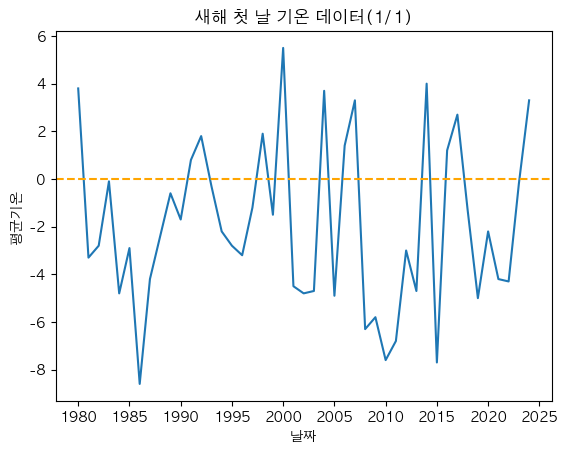

In [33]:
# 새해 첫 날 기온 데이터
day = birth_df['날짜'].values
temp_avg = birth_df['평균기온'].values

plt.plot(day,temp_avg)
plt.xlabel('날짜')
plt.ylabel('평균기온')
plt.title('새해 첫 날 기온 데이터(1/1)')
plt.axhline(y=0, color='orange', linestyle='--')
plt.show()

#### 크리스마스 최고,최저 기온 추이 

In [34]:
# 데이터 내, 크리스마스에 해당하는 모든 데이터 추출
cond = (df['월']==12) & (df['일']==25)
chris_df = df[cond]

chris_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
359,1980-12-25,108,-1.1,-4.0,2.2,1980,12,25
724,1981-12-25,108,2.3,-1.8,5.9,1981,12,25
1089,1982-12-25,108,-2.7,-5.4,0.4,1982,12,25
1454,1983-12-25,108,-9.4,-13.5,-5.1,1983,12,25
1820,1984-12-25,108,-8.0,-12.6,-3.3,1984,12,25


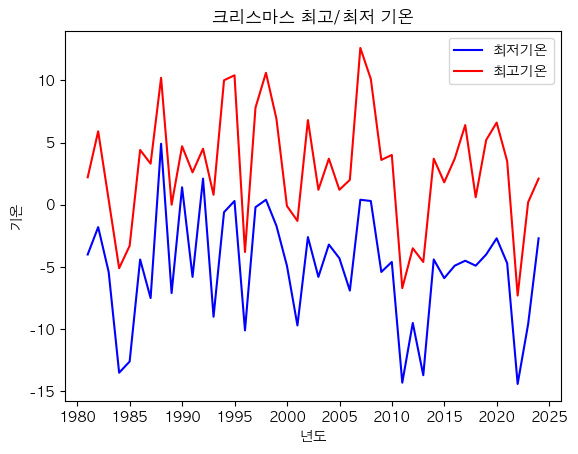

In [35]:
x = chris_df['날짜'].values
y1 = chris_df['최저기온'].values
y2 = chris_df['최고기온'].values
plt.plot(x,y1,label='최저기온',color='b') 
plt.plot(x,y2,label='최고기온',color='r') 
plt.title('크리스마스 최고/최저 기온')
plt.xlabel('년도')
plt.ylabel('기온')
plt.legend() #범례
plt.show()

#### 그래프 비교분석 

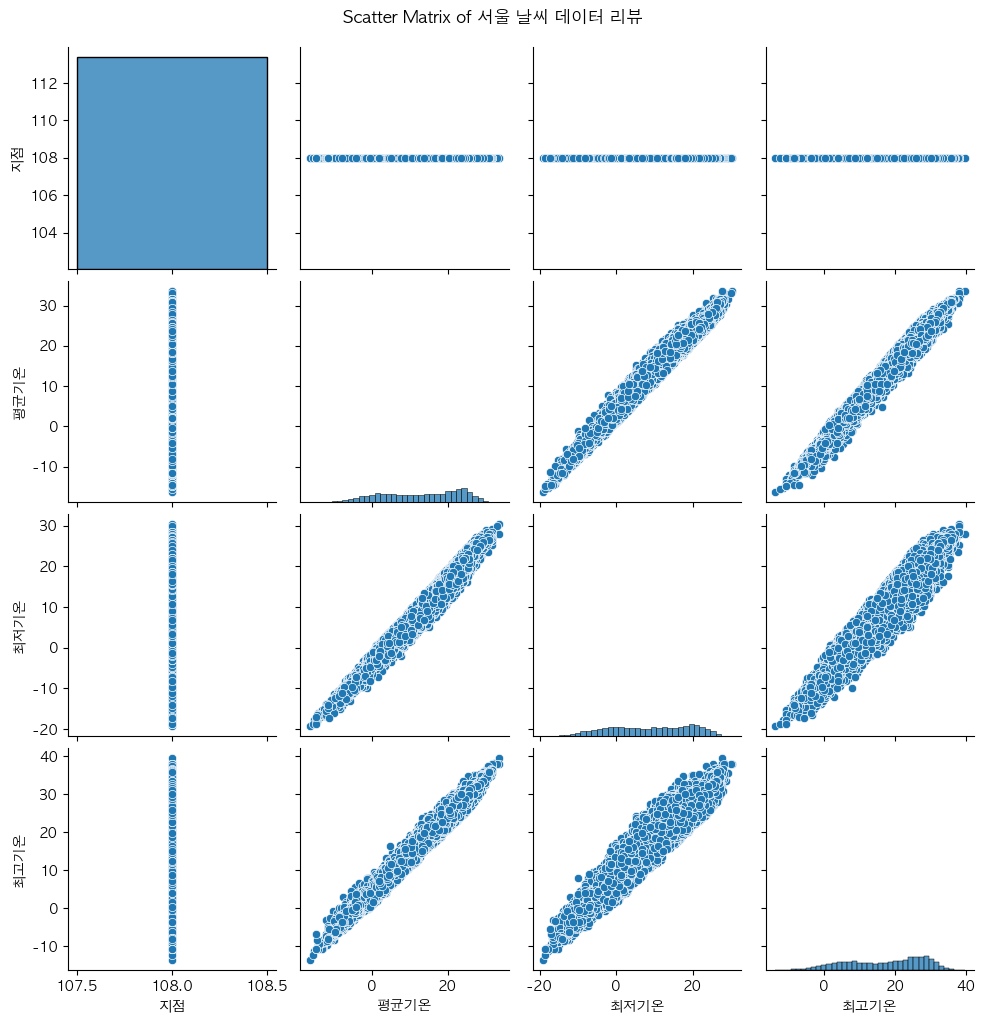

In [37]:
# 분석에 사용할만한? 주요 수치 데이터 선택(*지점=서울)
selected_columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
reviewGraph_selected = df[selected_columns]

# Scatter matrix 그리기
sns.pairplot(reviewGraph_selected)
plt.suptitle('Scatter Matrix of 서울 날씨 데이터 리뷰', y=1.02) # 제목 추가 
plt.show()


##### 서울 최고 기온 

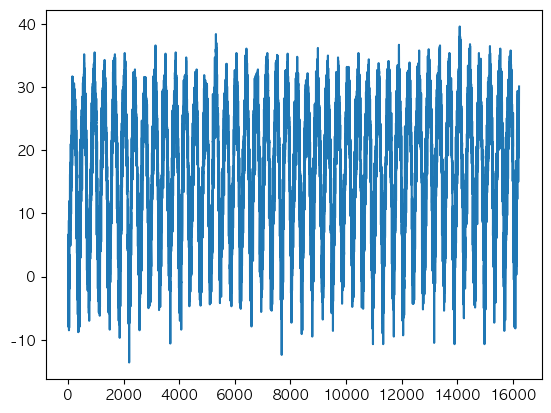

In [38]:
# On 라인 그래프
y=df['최고기온']
plt.plot(y)
plt.show() # 측정 분포 없음

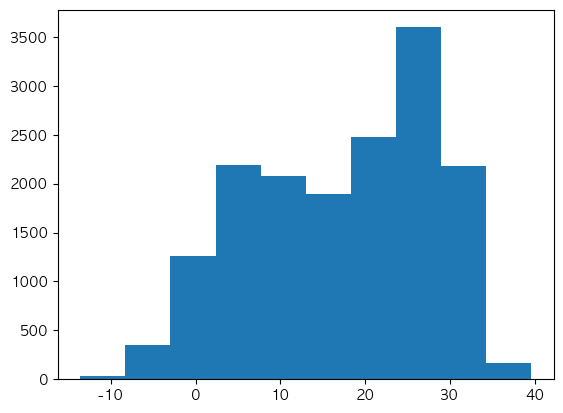

In [39]:
#matplotlib의 hist() 사용 - 최고기온 기준
x = df['최고기온']

plt.hist(x)
plt.show()

<Axes: >

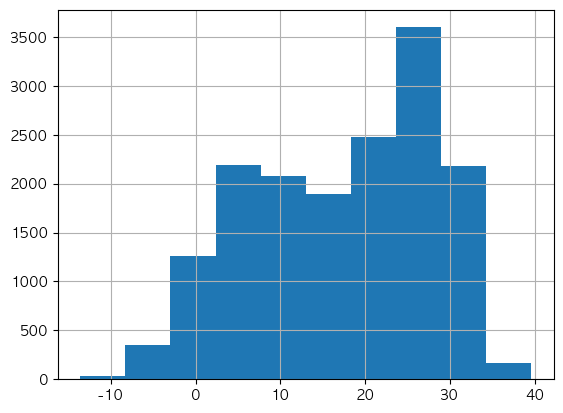

In [40]:
#pandas내의 hist() 사용
df['최고기온'].hist()

<Axes: >

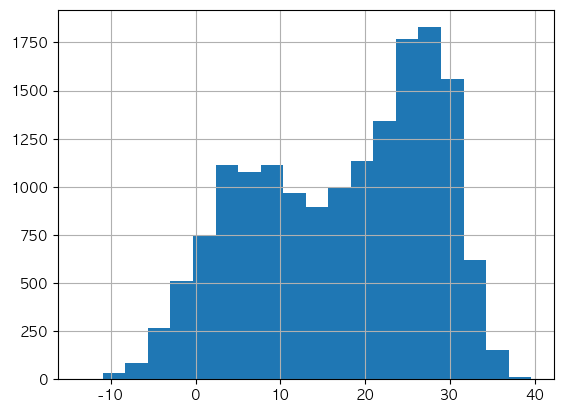

In [41]:
#수치형 피처의 경우 'bins' 조절을 적절하게....
df['최고기온'].hist(bins=20)

<Axes: >

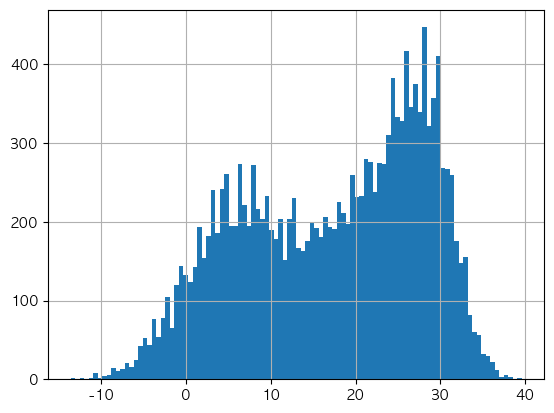

In [42]:
df['최고기온'].hist(bins=100)

##### 봄(2)/가을(8) 데이터를 히스토그램으로 시각화 

In [43]:
# 봄(2월) 데이터만 추출
feb_df = df[df['월']==2]
feb_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
31,1980-02-01,108,-10.0,-14.0,-4.9,1980,2,1
32,1980-02-02,108,-6.8,-10.3,-2.0,1980,2,2
33,1980-02-03,108,-6.2,-9.3,-2.1,1980,2,3
34,1980-02-04,108,-9.8,-12.7,-6.2,1980,2,4
35,1980-02-05,108,-9.7,-12.5,-6.1,1980,2,5


In [44]:
# 가을(8월) 데이터만 추출
aug_df = df[df['월']==8]
aug_df.head()


,날짜,지점,평균기온,최저기온,최고기온,년,월,일
213,1980-08-01,108,24.3,17.4,30.6,1980,8,1
214,1980-08-02,108,24.9,19.4,29.9,1980,8,2
215,1980-08-03,108,23.4,18.8,27.8,1980,8,3
216,1980-08-04,108,23.7,20.9,28.9,1980,8,4
217,1980-08-05,108,23.0,19.4,28.2,1980,8,5


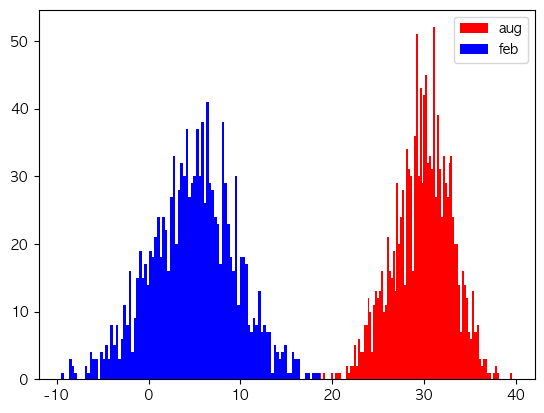

In [45]:
# 히스토그램 시각화
x1 = aug_df['최고기온']
x2 = feb_df['최고기온']

plt.hist(x1,bins=100,color='r',label='aug')
plt.hist(x2,bins=100,color='b',label='feb')
plt.legend()
plt.show()

#### 평균과 이상치 기온 분포 확인

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/weather_seoul_1980to2024.csv')
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

#결측치 제거
df.dropna(inplace=True)

# 형변환
df['날짜'] = pd.to_datetime(df['날짜'])

#파생변수 생성
df['년']=df['날짜'].dt.year
df['월']=df['날짜'].dt.month
df['일']=df['날짜'].dt.day
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1980-01-01,108,3.8,0.5,6.6,1980,1,1
1,1980-01-02,108,4.7,3.5,5.9,1980,1,2
2,1980-01-03,108,3.8,-0.5,6.2,1980,1,3
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1,4
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1,5


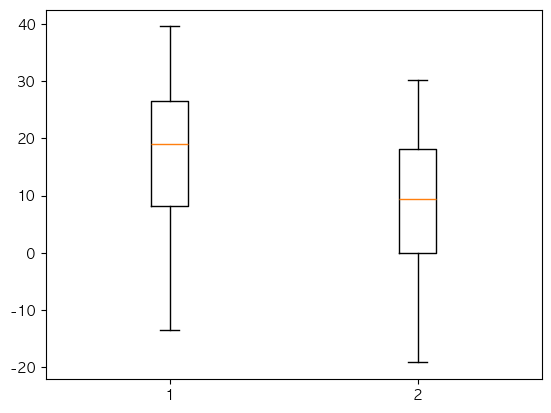

In [74]:
# 최고/최저 기온 boxplot 시각화
x = df['최고기온'].values
y = df['최저기온'].values
plt.boxplot([x,y])
plt.show()

<Axes: >

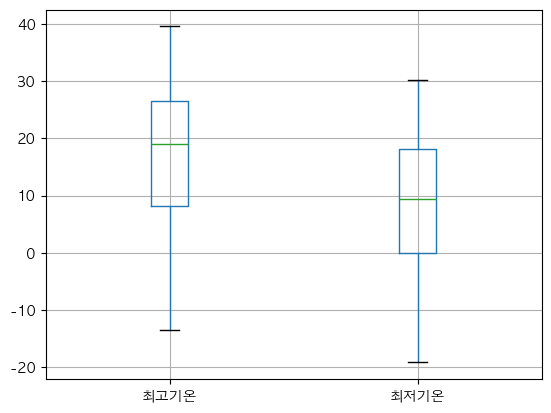

In [77]:
#pandas내의 boxplot() 사용
df[['최고기온','최저기온']].boxplot()


#### 월별 기온 분포

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('data/weather_seoul_1980to2024.csv')

# 컬럼 이름 변경
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

#결측치 제거
df.dropna(inplace=True)


# 날짜 데이터 Str => date 형으로 변환
# df['날짜'] = pd.to_datetime(df['날짜'])
df['날짜'] = df['날짜'].astype('datetime64[ns]')

df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [3]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1980-01-01,108,3.8,0.5,6.6,1980,1,1
1,1980-01-02,108,4.7,3.5,5.9,1980,1,2
2,1980-01-03,108,3.8,-0.5,6.2,1980,1,3
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1,4
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1,5


In [80]:
cond = df['월'] == 1
cond

0         True
1         True
2         True
3         True
4         True
         ...  
16223    False
16224    False
16225    False
16226    False
16227    False
Name: 월, Length: 16226, dtype: bool

In [81]:
df[cond]['평균기온']

0        3.8
1        4.7
2        3.8
3       -3.2
4       -5.3
        ... 
16097   -0.5
16098   -1.5
16099   -0.4
16100    1.4
16101    4.7
Name: 평균기온, Length: 1395, dtype: float64

In [82]:
df.loc[cond,'평균기온']

0        3.8
1        4.7
2        3.8
3       -3.2
4       -5.3
        ... 
16097   -0.5
16098   -1.5
16099   -0.4
16100    1.4
16101    4.7
Name: 평균기온, Length: 1395, dtype: float64

In [86]:
avg_month = []

for i in range(1,13):
    avg_month.append(df.loc[df['월']==i,'평균기온'])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [87]:
len(avg_month)

12

In [88]:
avg_month[1]

31      -10.0
32       -6.8
33       -6.2
34       -9.8
35       -9.7
         ... 
16126     2.8
16127     3.8
16128     5.3
16129     6.4
16130     4.8
Name: 평균기온, Length: 1272, dtype: float64

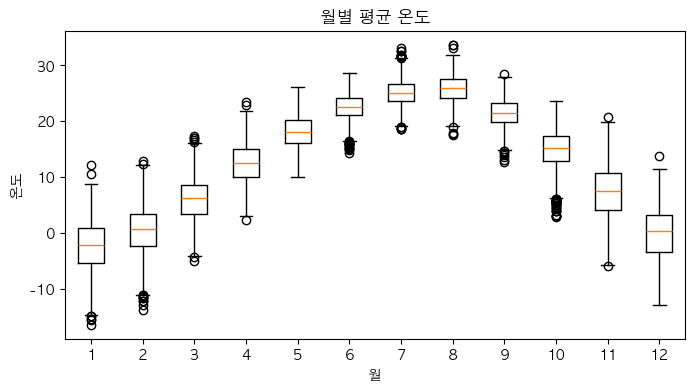

In [94]:
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

plt.figure(figsize=(8,4)) # 비율에 따른 결과 확인 할 것
plt.boxplot(avg_month)
plt.xlabel('월')
plt.ylabel('온도')
plt.title('월별 평균 온도')
plt.show()

#### 추가하면 좋을 레퍼런스 

- boxplot관련 추가 상세한 예제 코드 : https://rfriend.tistory.com/410 
- 코드는 없지만, 공모전 사례 : https://velog.io/@dw1015/PJT1.-%EC%84%9C%EC%9A%B8%EC%8B%9C-%ED%8F%89%EA%B7%A0%EA%B8%B0%EC%98%A8-%EC%98%88%EC%B8%A1with-DACON